In [1]:
%load_ext autoreload
%autoreload 2

import cPickle as pickle
import os; import sys; sys.path.append('..')
import gp
import gp.nets as nets

from nolearn.lasagne.visualize import plot_loss
from nolearn.lasagne.visualize import plot_conv_weights
from nolearn.lasagne.visualize import plot_conv_activity
from nolearn.lasagne.visualize import plot_occlusion

from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, precision_recall_fscore_support, f1_score, precision_recall_curve, average_precision_score, zero_one_loss


from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

%matplotlib inline

/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
NETS = []
NETS.append('../nets/IP_FULL.p') # image + prob
NETS.append('../nets/IPLB_FULL.p') # image + large border
NETS.append('../nets/IPM_FULL.p') # image + prob + binary
NETS.append('../nets/IPMB_FULL.p') # image + prob + binary + border
NETS.append('../nets/IPMLB_FULL.p') # image + prob + binary + large border

network_path = NETS[-1]

with open(network_path, 'rb') as f:
    net = pickle.load(f)

In [3]:
X_test, y_test = gp.Patch.load_rgba_test_only('ipmlb')

Loaded /home/d/patches//ipmlb/ in 0.000300884246826 seconds.


In [4]:
test_prediction = net.predict(X_test)
test_prediction_prob = net.predict_proba(X_test)
print
print 'Precision/Recall:'
print classification_report(y_test, test_prediction)


Precision/Recall:
             precision    recall  f1-score   support

          0       0.96      0.92      0.94      8780
          1       0.92      0.96      0.94      8780

avg / total       0.94      0.94      0.94     17560



In [5]:
test_acc = net.score(X_test, y_test)
acc_score = accuracy_score(y_test, test_prediction)
print 'Test Accuracy:', test_acc
print 'Accuracy Score:', acc_score

Test Accuracy: 0.940432801822
Accuracy Score: 0.940432801822


In [6]:
import numpy as np

In [8]:
import collections
from collections import OrderedDict

In [25]:
fpr2 = fpr - 0.01
tpr2 = tpr - 0.01
fpr3 = fpr + 0.02
tpr3 = tpr - 0.02
fpr4 = fpr + 0.025
tpr4 = tpr - 0.025

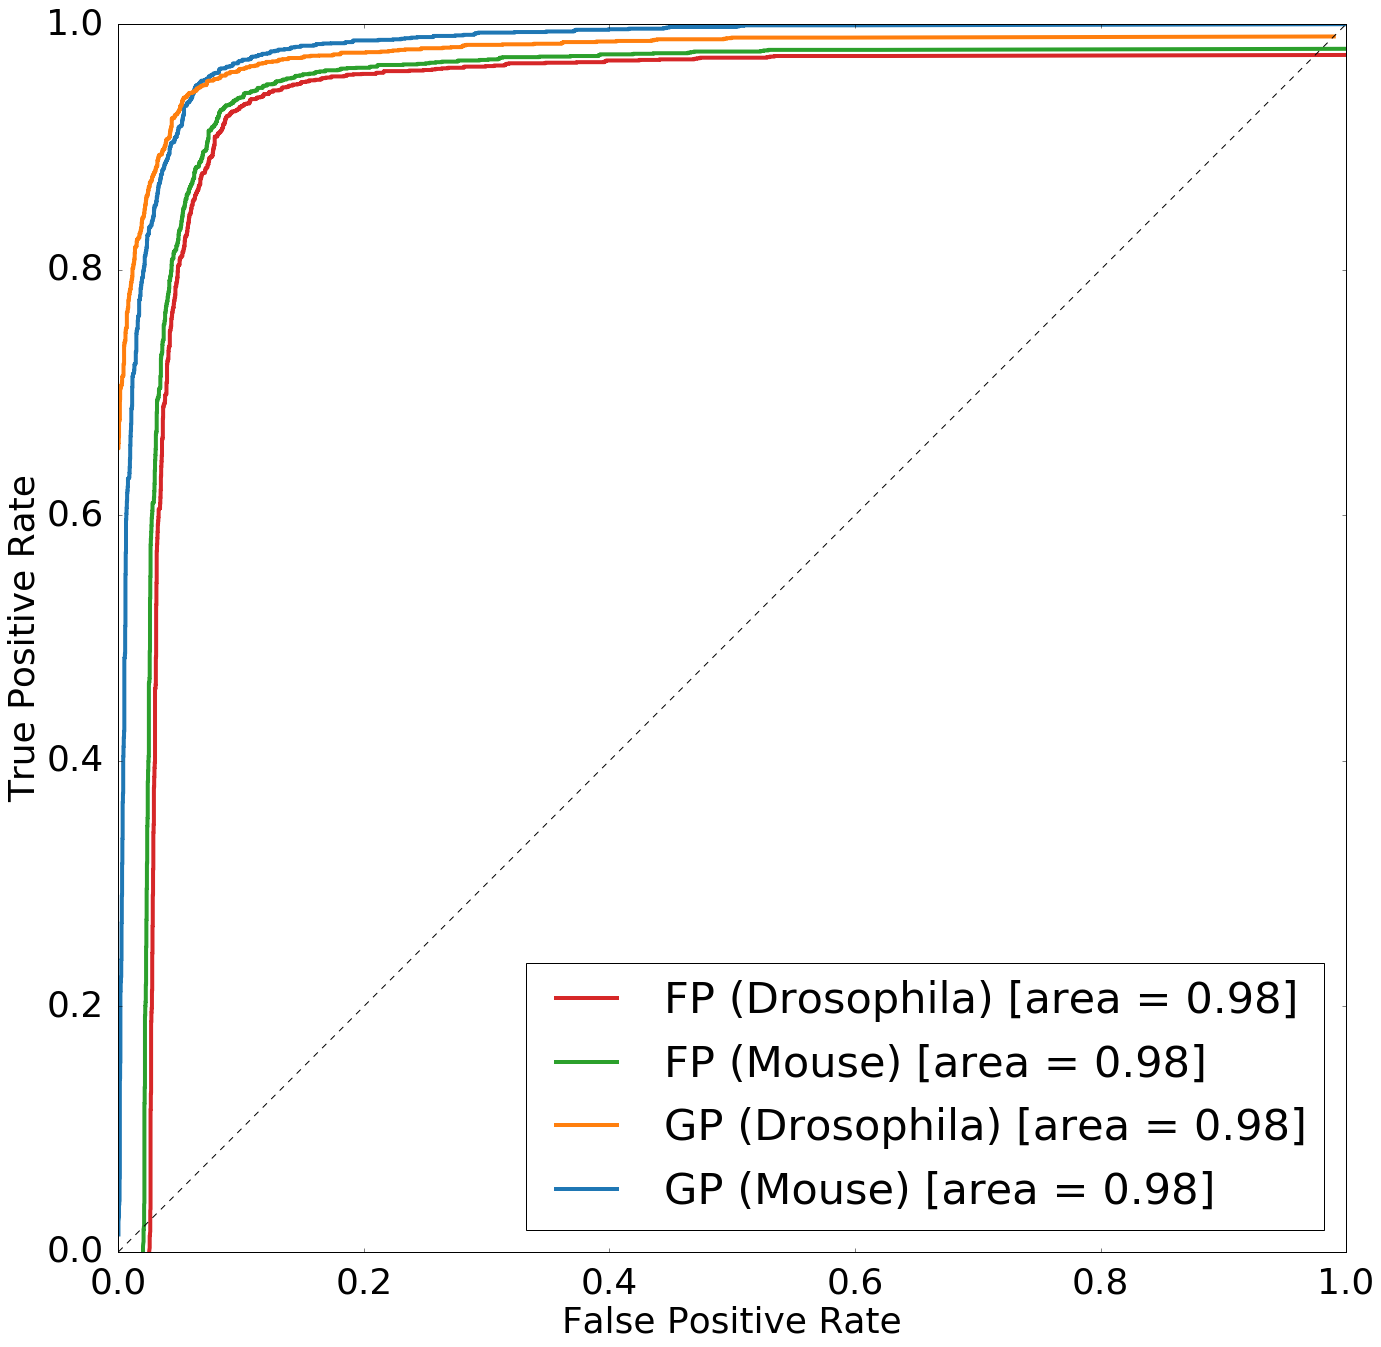

In [27]:
# ROC/AUC
fpr, tpr, _ = roc_curve(y_test, test_prediction_prob[:,1])
roc_auc = auc(fpr, tpr)
data = OrderedDict()
data['GP (Mouse)'] = (fpr, tpr, roc_auc)
data['GP (Drosophila)'] = (fpr2, tpr2, roc_auc)
data['FP (Mouse)'] = (fpr3, tpr3, roc_auc)
data['FP (Drosophila)'] = (fpr4, tpr4, roc_auc)
gp.Legacy.plot_roc(data,'/tmp/roc.pdf')

In [28]:
output_folder = '/home/d/netstatsNEW/IPMLB/'


In [5]:
input_image, input_prob, input_gold, input_rhoana, dojo_bbox = gp.Legacy.read_dojo_data()


original_mean_VI, original_median_VI, original_VI_s = gp.Legacy.VI(input_gold, input_rhoana)


In [6]:
    dojo_input_vi = gp.Legacy.VI(input_gold, input_rhoana)[2]
    dojo_best_user = [0.3764043166,
                      0.3516472472,
                      0.4079547444,
                      0.4530306854,
                      0.489459557,
                      0.4783714198,
                      0.4691797846,
                      0.4852945057,
                      0.4989719721,
                      0.4631116968]

    dojo_avg_user = [0.4731860794,
                     0.4412143846,
                     0.4645102603,
                     0.4790327986,
                     0.5483534853,
                     0.5209529753,
                     0.5614397773,
                     0.5669964498,
                     0.6037881064,
                     0.5986637472]

    dojo_novice = [0.37012190195707095,
                   0.38968960153287835,
                   0.37045672764672943,
                   0.38191441070762,
                   0.45717155397457265,
                   0.4307223374738305,
                   0.46325236818430504,
                   0.5049116191382206,
                   0.45915778345523783,
                   0.5901800985629162]

    # josh
    dojo_expert1 = [0.37484603520770676,
                    0.3939621266824016,
                    0.3896524948878737,
                    0.39639562518511084,
                    0.4477210348104004,
                    0.4647934798574145,
                    0.4647357412387576,
                    0.4583758825458508,
                    0.42396064070850503,
                    0.4060052118497355]

    # alyssa
    dojo_expert2 = [0.36955775659747747,
                    0.39250293829836735,
                    0.3688303634072678,
                    0.37744240803449625,
                    0.40022644067826807,
                    0.3815527838331203,
                    0.4472774009966649,
                    0.44162415508056707,
                    0.4729849772418282,
                    0.4966401210922369]

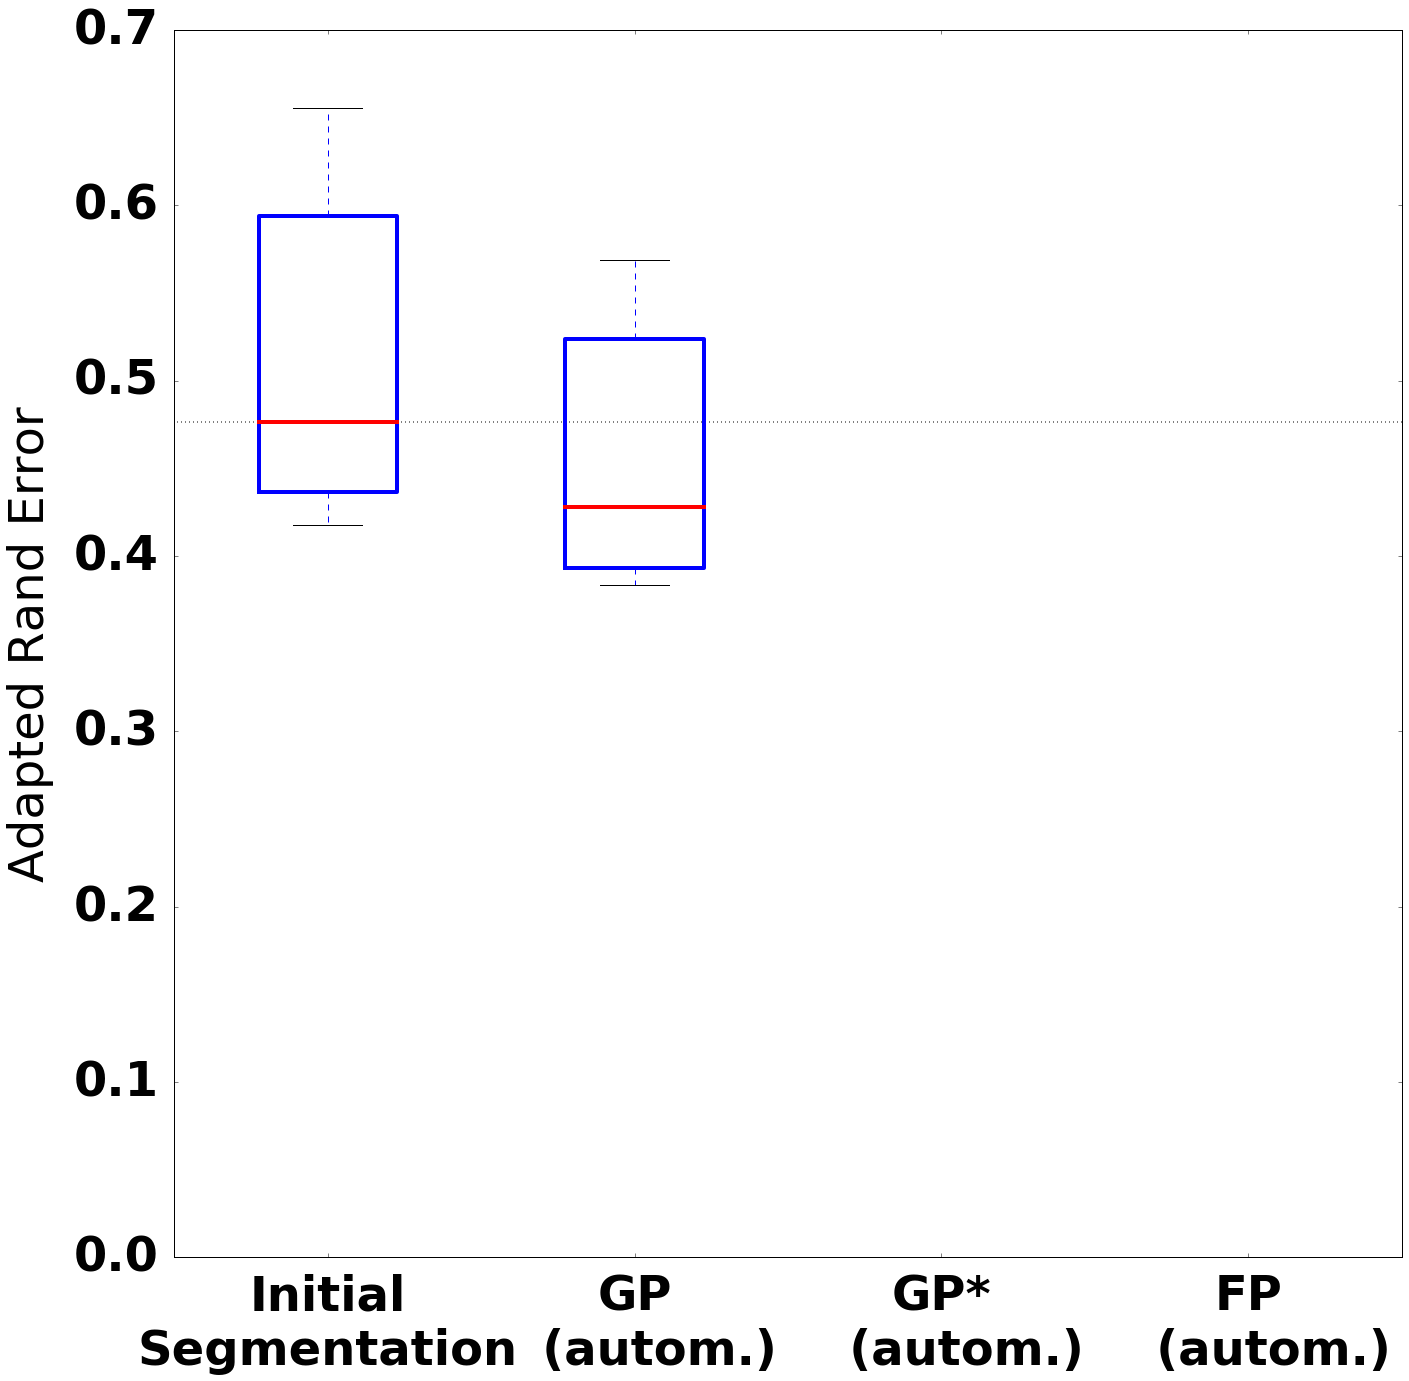

In [63]:
    data = collections.OrderedDict()
    data['Initial\nSegmentation'] = dojo_input_vi
    data['GP\n   (autom.)'] = dojo_vi_95[2]
    data['GP*\n   (autom.)'] = []#[v - 0.1 for v in dojo_vi_95[2]]
    data['FP\n   (autom.)'] = []#dojo_vi_95[2]

    gp.Legacy.plot_arand(data, '/tmp/dojo_automatic.pdf')#, output_folder+'/dojo_vi.pdf')

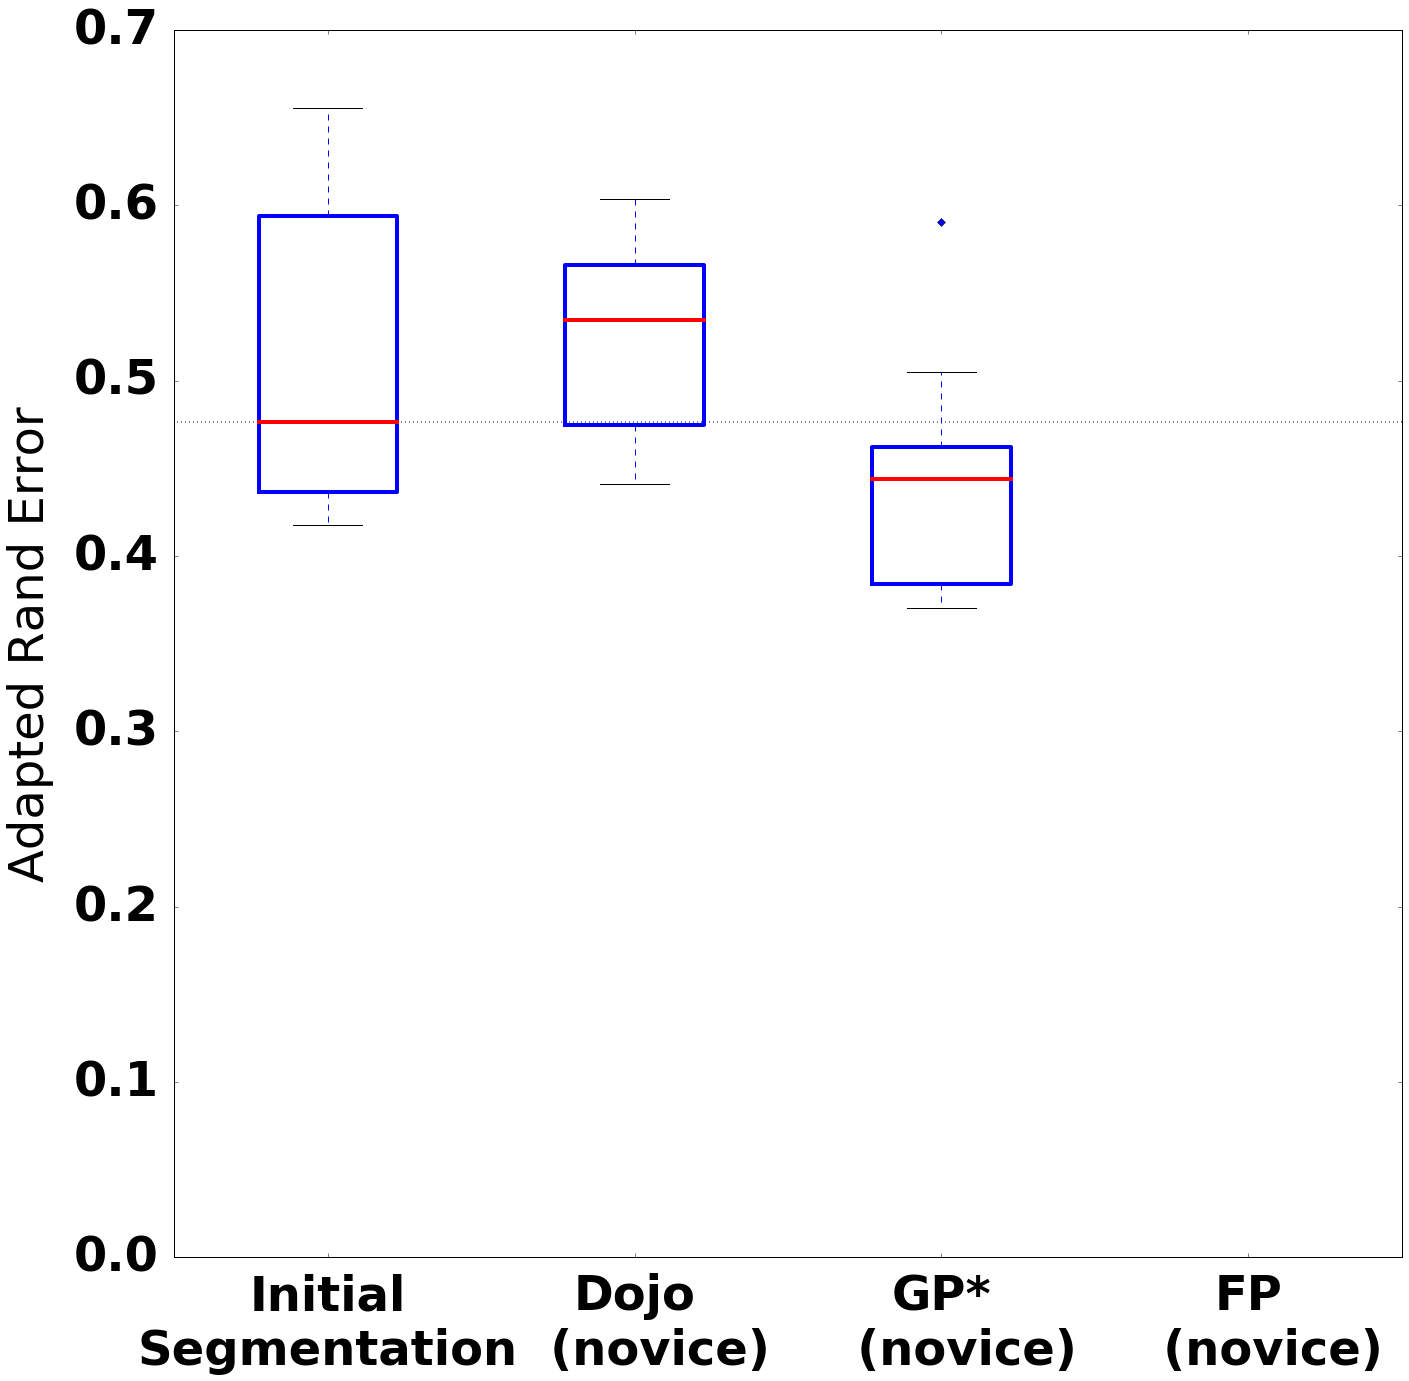

In [64]:
    data = collections.OrderedDict()
    data['Initial\nSegmentation'] = dojo_input_vi
    data['Dojo\n   (novice)'] = dojo_avg_user
    data['GP*\n   (novice)'] = dojo_novice
    data['FP\n   (novice)'] = []#[v - 0.1 for v in dojo_vi_95[2]]
#     data['FP\n(autom.)'] = []#dojo_vi_95[2]

    gp.Legacy.plot_arand(data, '/tmp/dojo_novice.pdf')#, output_folder+'/dojo_vi.pdf')

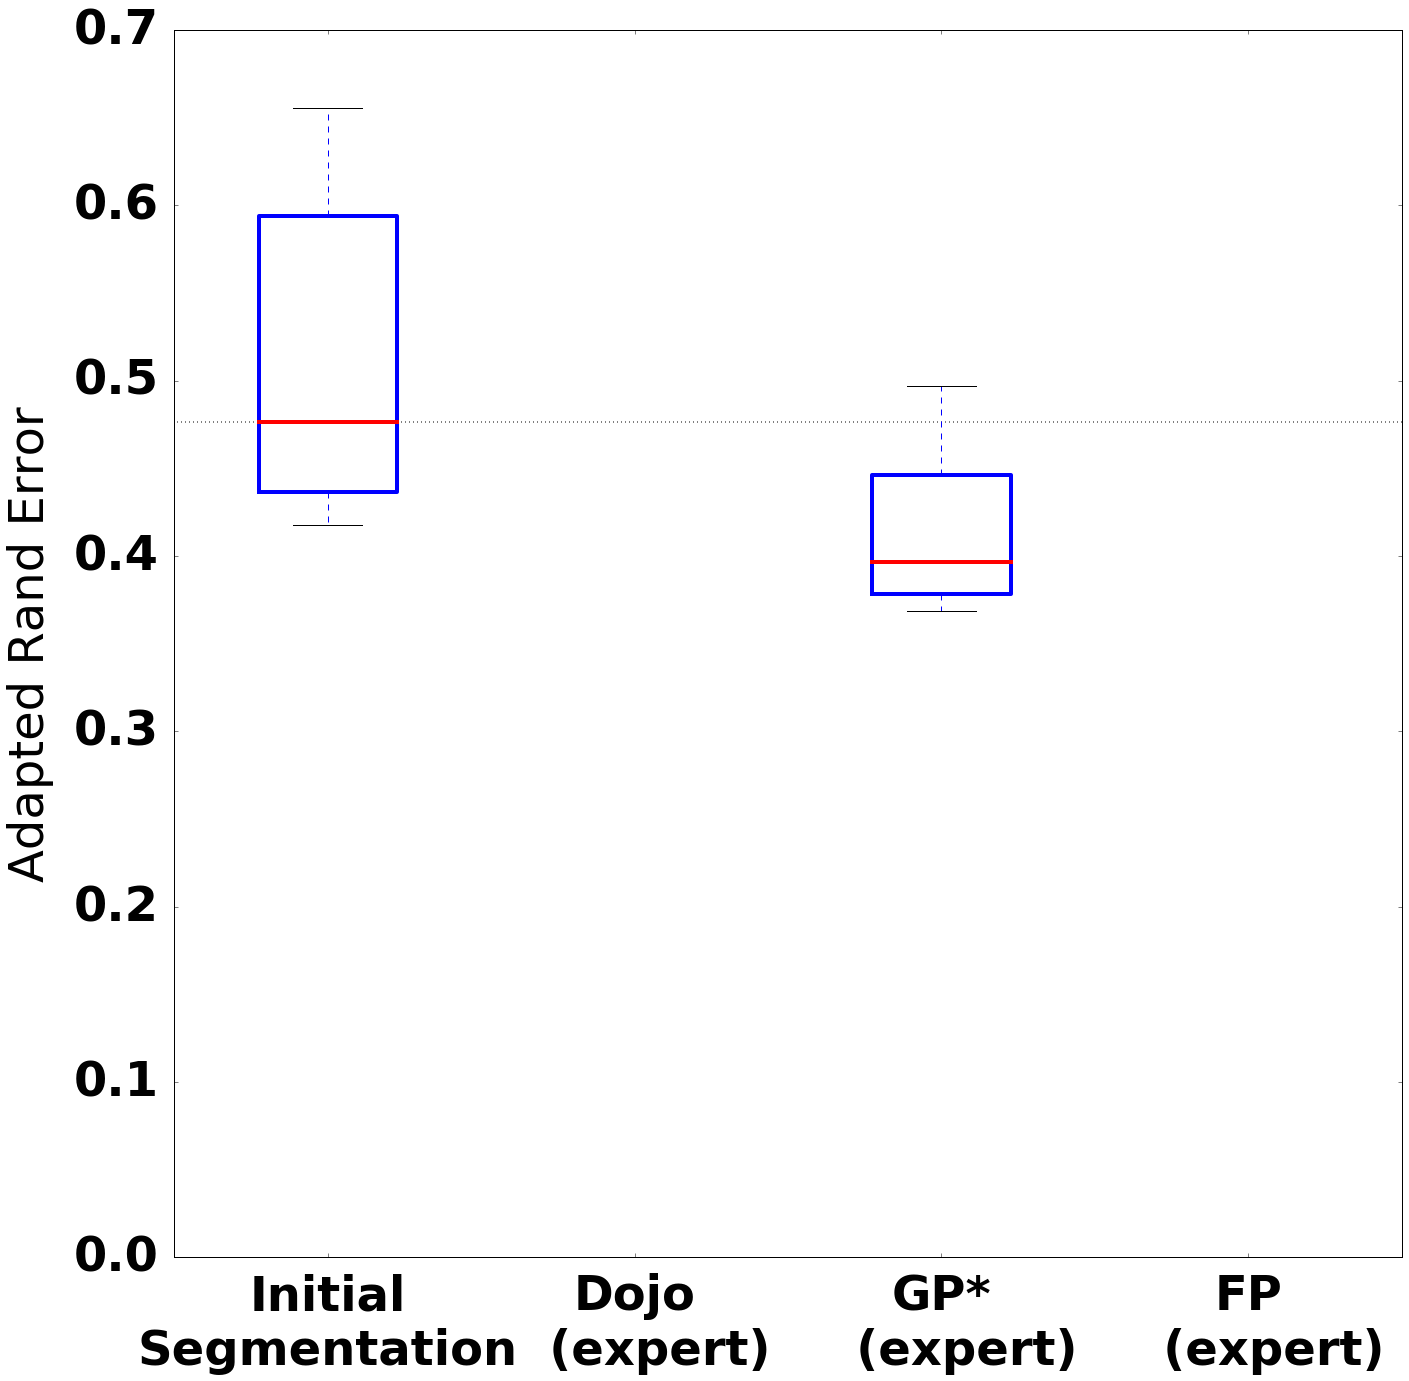

In [65]:
    data = collections.OrderedDict()
    data['Initial\nSegmentation'] = dojo_input_vi
    data['Dojo\n   (expert)'] = []
    data['GP*\n   (expert)'] = dojo_expert2
    data['FP\n   (expert)'] = []#[v - 0.1 for v in dojo_vi_95[2]]
#     data['FP\n(autom.)'] = []#dojo_vi_95[2]

    gp.Legacy.plot_arand(data, '/tmp/dojo_expert.pdf')#, output_folder+'/dojo_vi.pdf')

In [23]:
    input_image = []
    input_prob = []
    input_rhoana = []
    input_gold = []
    for z in range(250, 300):
        image, prob, mask, gold, rhoana = gp.Util.read_section('/home/d/data/cylinderNEW/', z, verbose=False)

        input_image.append(image)
        input_prob.append(255.-prob)
        input_rhoana.append(rhoana)
        input_gold.append(gold)


    original_mean_VI, original_median_VI, original_VI_s = gp.Legacy.VI(input_gold, input_rhoana)


In [29]:
    cylinder_vi_95_file = output_folder + '/cylinder_vi_95.p'
    cylinder_vi_auto_95_fixes_file = output_folder + '/cylinder_vi_95_fixes.p'
    cylinder_auto_vis_95_file = output_folder + '/cylinder_auto_vis_95.p'
    print cylinder_vi_95_file
    if os.path.exists(cylinder_vi_95_file):
      print 'Loading merge errors p < .05 and split errors p > .95 from file..'
      with open(cylinder_vi_95_file, 'rb') as f:
        cylinder_vi_95 = pickle.load(f)
      with open(cylinder_auto_vis_95_file, 'rb') as f:
        cylinder_auto_vi_s_95 = pickle.load(f)
      with open(cylinder_vi_auto_95_fixes_file, 'rb') as f:
        cylinder_auto_fixes_95 = pickle.load(f)

/home/d/netstatsNEW/IPMLB//cylinder_vi_95.p
Loading merge errors p < .05 and split errors p > .95 from file..


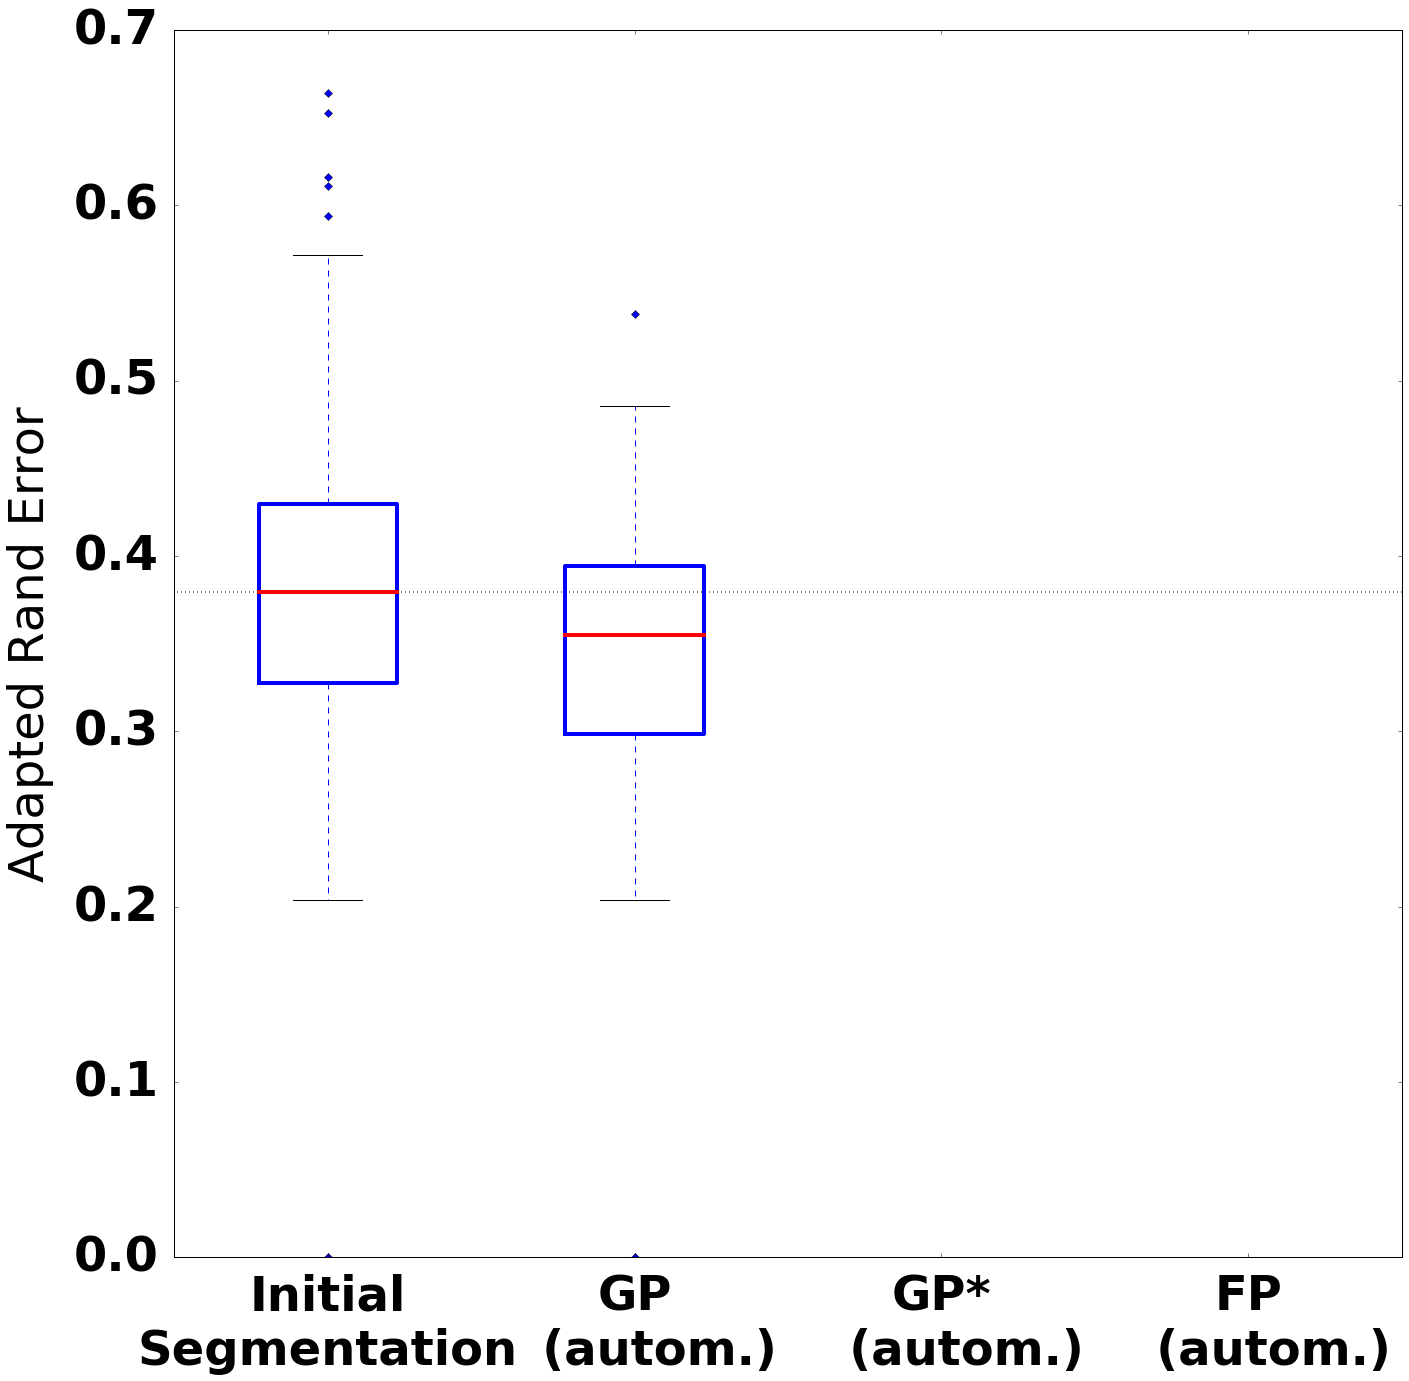

In [67]:
data = collections.OrderedDict()
data['Initial\nSegmentation'] = original_VI_s
data['GP\n   (autom.)'] = cylinder_vi_95[2]
data['GP*\n   (autom.)'] = []#[v - 0.1 for v in dojo_vi_95[2]]
data['FP\n   (autom.)'] = []#dojo_vi_95[2]

gp.Legacy.plot_arand(data, '/tmp/dojo_automatic.pdf')#, output_folder+'/dojo_vi.pdf')

In [34]:
    cylinder_vi_simuser_file = output_folder + '/cylinder_vi_simuser.p'
    cylinder_fixes_simuser_file = output_folder + '/cylinder_fixes_simuser.p'
    cylinder_vis_simuser_file = output_folder + '/cylinder_vi_s_simuser.p'
    if os.path.exists(cylinder_vi_simuser_file):
      print 'Loading merge errors and split errors (simulated user) from file..'
      with open(cylinder_vi_simuser_file, 'rb') as f:
        cylinder_vi_simuser = pickle.load(f)
      with open(cylinder_fixes_simuser_file, 'rb') as f:
        cylinder_sim_user_fixes = pickle.load(f)
      with open(cylinder_vis_simuser_file, 'rb') as f:
        cylinder_sim_user_vi_s = pickle.load(f)


Loading merge errors and split errors (simulated user) from file..


In [36]:
cylinder_sim_user_vi_s

[[0.30183265137825455,
  0.3117399959575389,
  0.326139507839704,
  0.2916566695580167,
  0.3091472145115066,
  0.33983861255074554,
  0.34281113168431787,
  0.35918952522076975,
  0.41199922255281063,
  0.5616412459208711,
  0.5475587070916816,
  0.628234609896964,
  0.6327811123081588,
  0.5149133500060703,
  0.588183487585674,
  0.5933394469140403,
  0.4687450339056465,
  0.37040545579388606,
  0.3724414465510737,
  0.33823652811103777,
  0.4472212984758883,
  0.43107412851763804,
  0.3884415564054713,
  0.3947645386647096,
  0.3142857753215287,
  0.36442716274360887,
  0.38149388112001326,
  0.3882214512216011,
  0.37826555075321266,
  0.4866185368558398,
  0.4468894195216633,
  0.34063523412162944,
  0.422728434606225,
  0.36023462795048466,
  0.44540911296099495,
  0.31566436464155867,
  0.3027036056322894,
  0.3511621020575797,
  0.3799471782488819,
  0.3999766933281341,
  0.3934091101050292,
  0.3651650911958093,
  0.29909435225768277,
  0.351467426037984,
  0.2633338358395134,

In [37]:
cylinder_vi_95

(0.3489528735975771,
 0.35474923047467399,
 [0.2677522404813404,
  0.2829112709286914,
  0.2910857642723501,
  0.280228364367896,
  0.29432081573240154,
  0.3182676564037843,
  0.3181857422089207,
  0.3012173242906204,
  0.35422274749765936,
  0.4807194928900653,
  0.4496165544827875,
  0.47481710231836693,
  0.4856099955165991,
  0.404032255673501,
  0.4816065260730529,
  0.5377962282278572,
  0.45655399746114433,
  0.36916565453412176,
  0.29788134409322886,
  0.30079044917834263,
  0.3509114569440994,
  0.3965225724836374,
  0.362536943027826,
  0.3368614520715978,
  0.3119310969222733,
  0.3625556564846155,
  0.3420201169375572,
  0.3566636953053548,
  0.38047161297463283,
  0.4753422165936767,
  0.41320314490942955,
  0.35738035332317253,
  0.45100222872291607,
  0.3569103480214375,
  0.3855561251362847,
  0.3100406001300158,
  0.3061643462388872,
  0.34301598630044783,
  0.37813092124230163,
  0.3866080556514797,
  0.3987816508713884,
  0.370849510011694,
  0.28502792722706527,
 

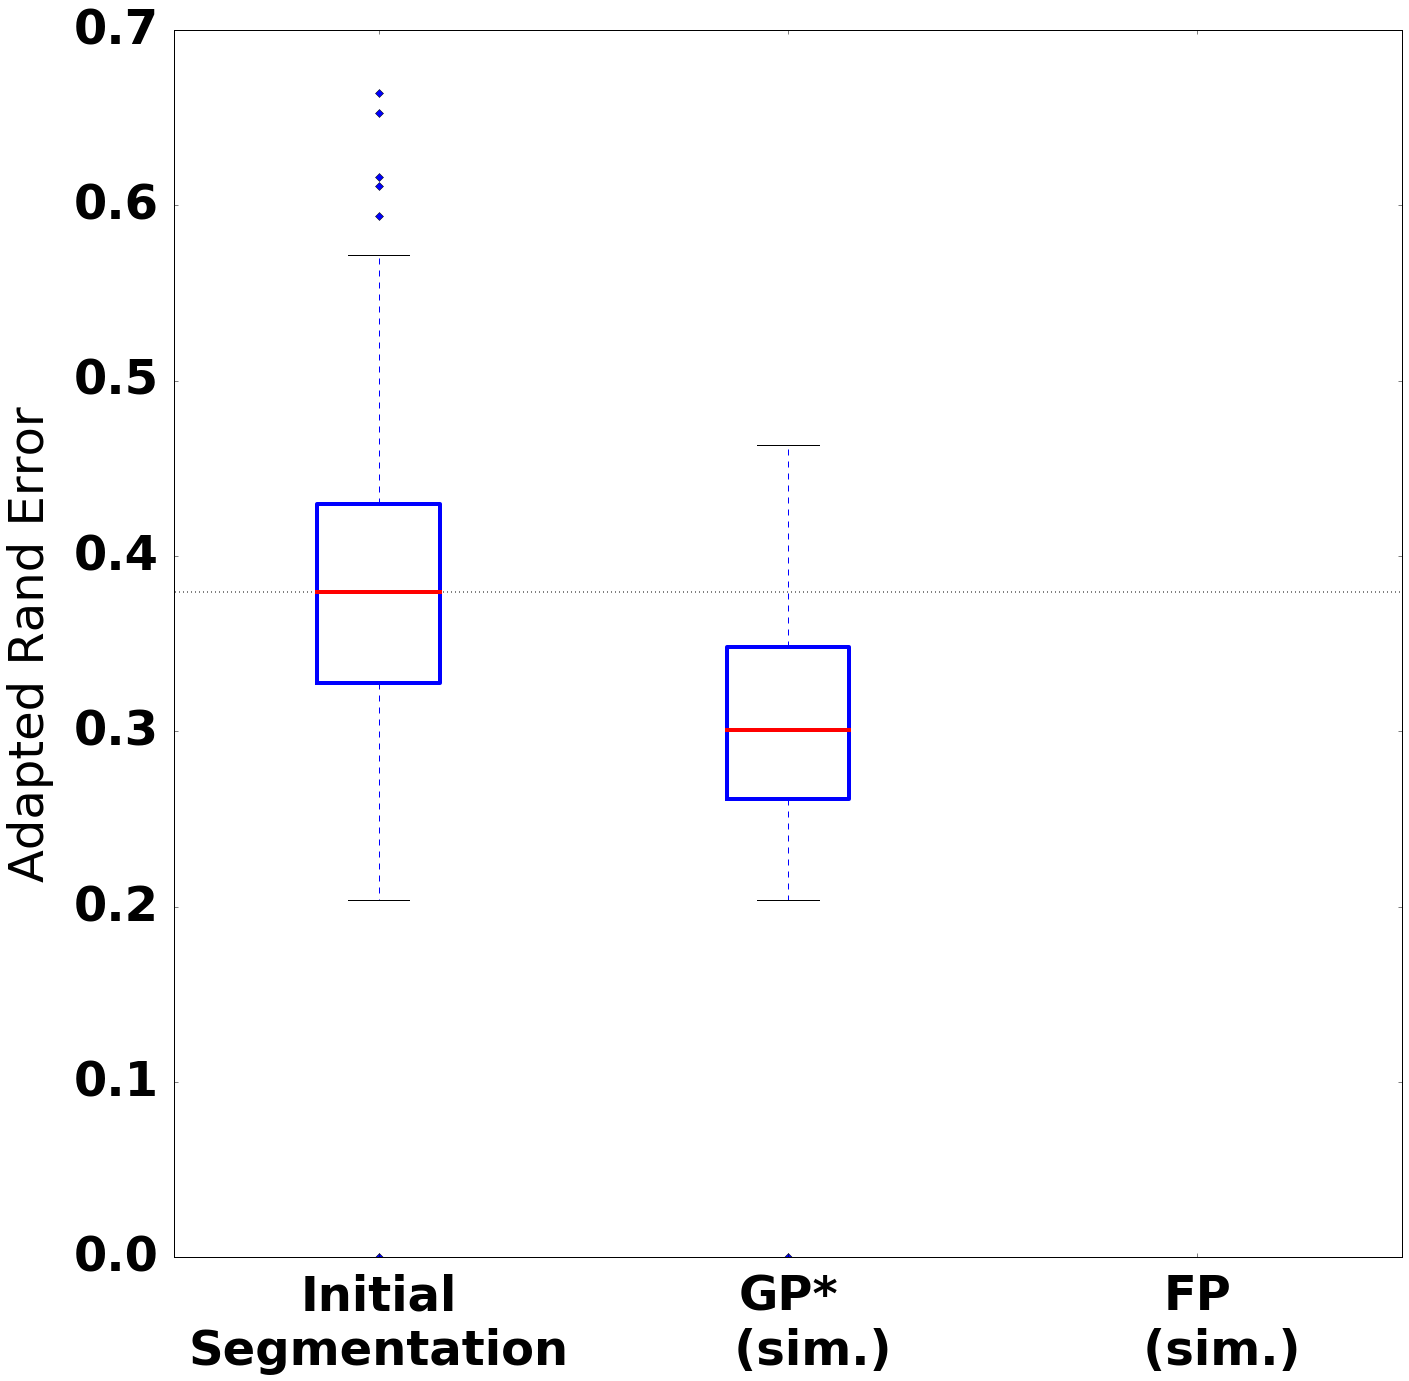

In [69]:
data = collections.OrderedDict()
data['Initial\nSegmentation'] = original_VI_s
data['GP*\n   (sim.)'] = cylinder_sim_user_vi_s[-1]
# data['GP*\n   (sim.)'] = []#[v - 0.1 for v in dojo_vi_95[2]]
data['FP\n   (sim.)'] = []#dojo_vi_95[2]

gp.Legacy.plot_arand(data, '/tmp/dojo_automatic.pdf')#, output_folder+'/dojo_vi.pdf')

In [40]:
import numpy as np

In [10]:
    dojo_vi_95_file = output_folder + '/dojo_vi_95.p'
    if os.path.exists(dojo_vi_95_file):
      print 'Loading merge errors p < .05 and split errors p > .95 from file..'
      with open(dojo_vi_95_file, 'rb') as f:
        dojo_vi_95 = pickle.load(f)

Loading merge errors p < .05 and split errors p > .95 from file..


In [44]:
    cylinder_vi_0_file = output_folder + '/cylinder_vi_0.p'
    cylinder_vi_auto_0_fixes_file = output_folder + '/cylinder_vi_0_fixes.p'
    cylinder_auto_vis_0_file = output_folder + '/cylinder_auto_vis_0.p'    
    if os.path.exists(cylinder_vi_0_file):
      print 'Loading split errors p >= .0 from file..'
      with open(cylinder_vi_0_file, 'rb') as f:
        cylinder_vi_0 = pickle.load(f)
      with open(cylinder_vi_auto_0_fixes_file, 'rb') as f:
        cylinder_auto_fixes_00 = pickle.load(f)
      with open(cylinder_auto_vis_0_file, 'rb') as f:
        cylinder_auto_vi_s_00 = pickle.load(f)

Loading split errors p >= .0 from file..


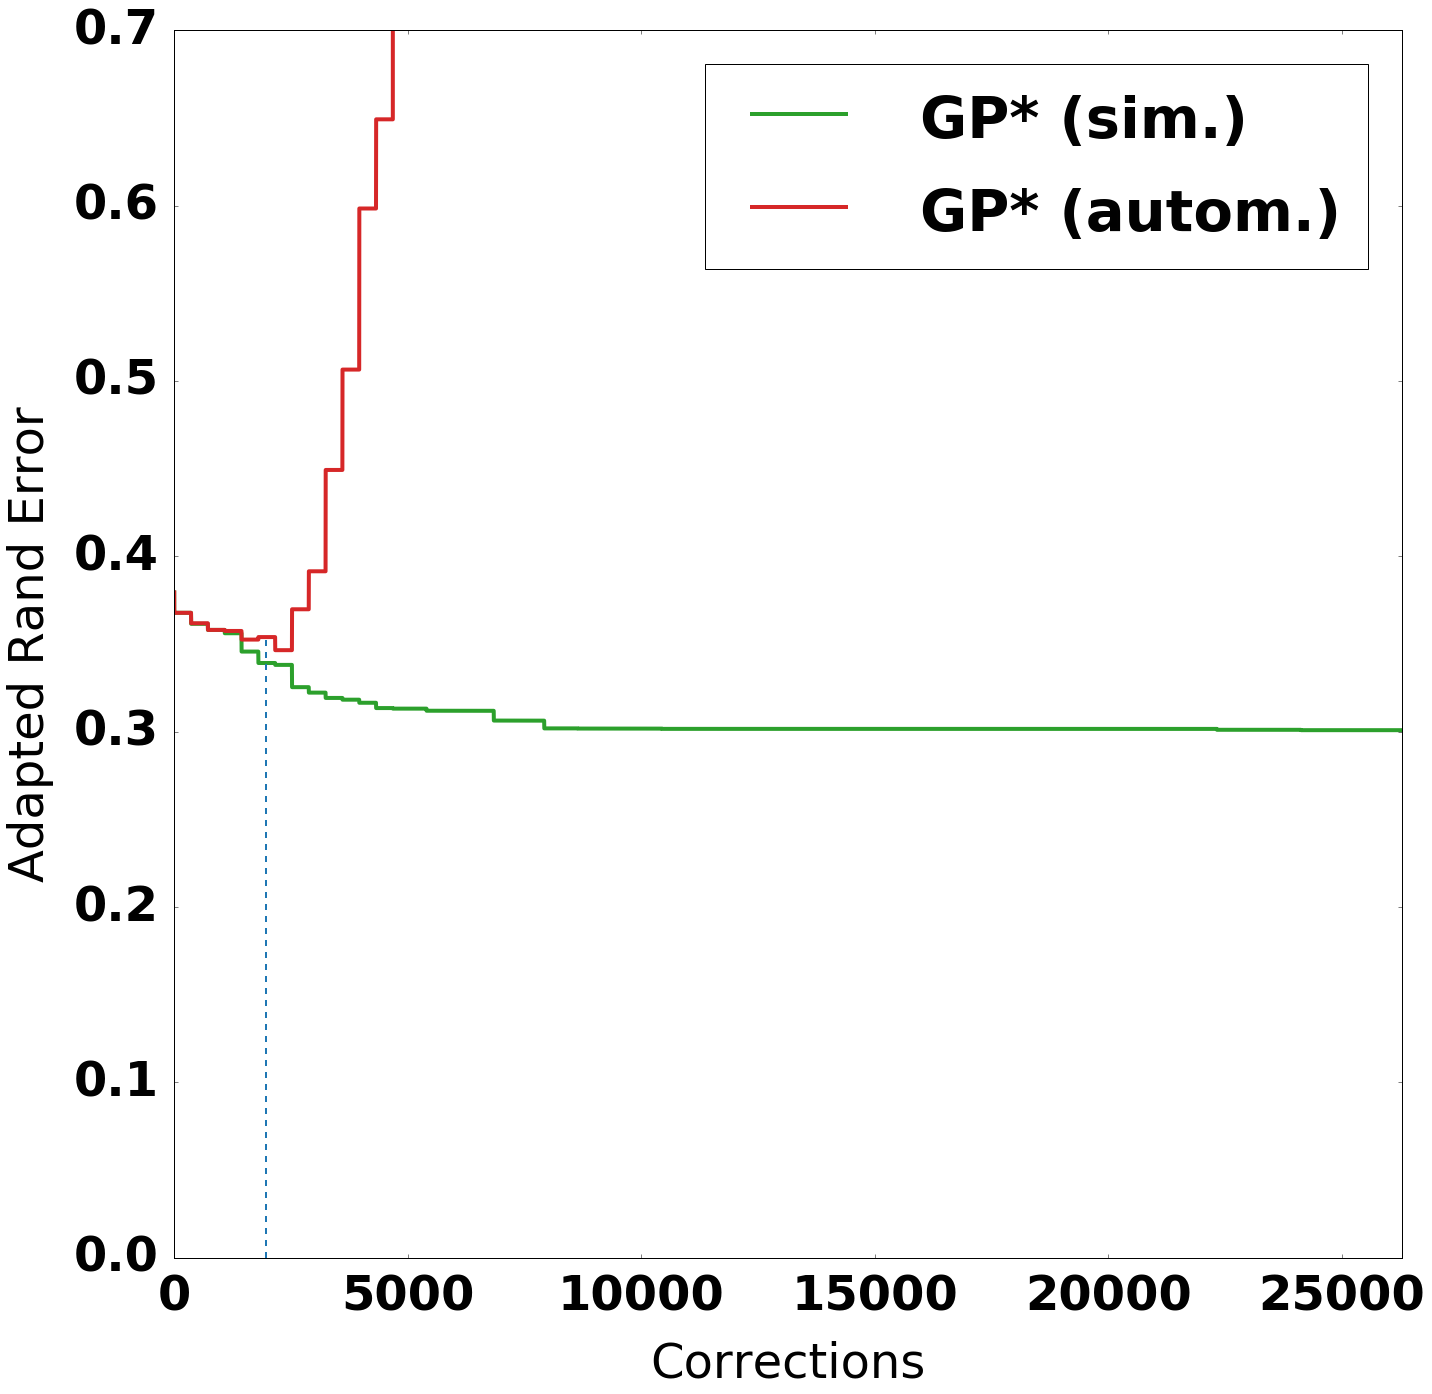

In [59]:
proofread_vis = [original_VI_s] + cylinder_sim_user_vi_s
vi_s_per_correction = [np.median(proofread_vis[0])]
for m in proofread_vis[1:]:
    for i in range(30*12):
        vi_s_per_correction.append(np.median(m))

# gp.Legacy.plot_vi_simuser(vi_s_per_correction, output_folder+'/cylinder_simuser_vi.pdf')

proofread_vis_auto = [original_VI_s] + cylinder_auto_vi_s_00
vi_s_per_correction_auto = [np.median(proofread_vis_auto[0])]
for m in proofread_vis_auto[1:]:
    for i in range(30*12):
        vi_s_per_correction_auto.append(np.median(m))

# gp.Legacy.plot_vi_combined(vi_s_per_correction_auto, vi_s_per_correction, output_folder+'/cylinder_combined_vi.pdf')

gp.Legacy.plot_vi_combined_no_interpolation(vi_s_per_correction_auto, vi_s_per_correction, output_folder+'/cylinder_combined_vi_no_interpolation.pdf')



In [47]:
len(cylinder_auto_fixes_95)

1972

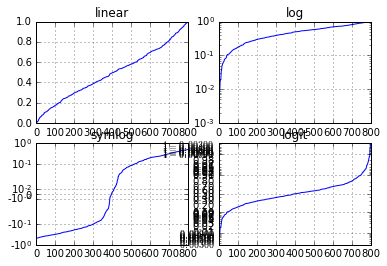

In [3]:


# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))
# plot with various axes scales
plt.figure(1)

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.05)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)

plt.show()